<a href="https://colab.research.google.com/github/LeandroCoelhos/credit_score/blob/main/Credit_Score_Modelagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
url1 = 'https://raw.githubusercontent.com/LeandroCoelhos/credit_score/main/data/treino.csv'
url2 = 'https://raw.githubusercontent.com/LeandroCoelhos/credit_score/main/data/teste.csv'

treino = pd.read_csv(url1)
teste = pd.read_csv(url2)

In [ ]:
def Renomeia(data):
  data.rename(columns = {'gender': 'Sexo',
                       'SeniorCitizen': 'Idoso',
                       'Partner': 'Parceiro',
                       'Dependents': 'Dependentes',
                       'tenure': 'Empresa',
                       'PhoneService':'Telefone',
                       'MultipleLines': 'VariasLinhas',
                       'InternetService': 'Provedor',
                       'OnlineSecurity': 'SegurancaOnline',
                       'OnlineBackup': 'BackupOnline',
                       'DeviceProtection': 'ProtecaoDispositivo',
                       'TechSupport': 'SuporteTecnico',
                       'StreamingTV': 'TV',
                       'StreamingMovies': 'Filmes',
                       'Contract': 'Contrato',
                       'PaperlessBilling': 'FaturaPapel',
                       'PaymentMethod': 'Pagamento'},inplace = True)
  return data

In [ ]:
Renomeia(treino)
Renomeia(teste)

,Sexo,Idoso,Parceiro,Dependentes,Empresa,Telefone,VariasLinhas,Provedor,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,TV,Filmes,Contrato,FaturaPapel,Pagamento
0,Female,0,Yes,Yes,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
2,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
3,Female,0,No,No,48,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
4,Male,0,Yes,No,71,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
2496,Female,0,Yes,Yes,1,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
2497,Male,1,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
2498,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic)


In [ ]:
def Mapeia(data):
  data['Sexo'] = data['Sexo'].map({'Male': 1, 'Female':0})
  data['Parceiro'] = data['Parceiro'].map({'Yes': 1, 'No':0})
  data['Dependentes'] = data['Dependentes'].map({'Yes': 1, 'No':0})
  data['Telefone'] = data['Telefone'].map({'Yes': 1, 'No':0})
  data['VariasLinhas'] = data['VariasLinhas'].map({'Yes': 1, 'No':0, 'No phone service':0})
  data['SegurancaOnline'] = data['SegurancaOnline'].map({'Yes': 1, 'No':0, 'No internet service':0})
  data['BackupOnline'] = data['BackupOnline'].map({'Yes': 1, 'No':0, 'No internet service':0})
  data['ProtecaoDispositivo'] = data['ProtecaoDispositivo'].map({'Yes': 1, 'No':0, 'No internet service':0})
  data['SuporteTecnico'] = data['SuporteTecnico'].map({'Yes': 1, 'No':0, 'No internet service':0})
  data['TV'] = data['TV'].map({'Yes': 1, 'No':0, 'No internet service':0})
  data['Filmes'] = data['Filmes'].map({'Yes': 1, 'No':0, 'No internet service':0})
  data['FaturaPapel'] = data['FaturaPapel'].map({'Yes': 1, 'No':0})
  data['Pagamento'] = data['Pagamento'].map({'Electronic check': 'Electronic', 'Mailed check': 'Mailed', 'Bank transfer (automatic)': 'automatic' , 'Credit card (automatic)': 'automatic'})
  data['FatorPremium'] = data['VariasLinhas'] + data['SegurancaOnline'] + data['BackupOnline'] + data['ProtecaoDispositivo'] + data['SuporteTecnico'] + data['TV'] + data['Filmes']
  return data

In [ ]:
treino['Cliente'] = treino['Cliente'].map({'Premium': 1, 'Normal':0})

dt_treino = Mapeia(treino)
dt_teste = Mapeia(teste)

In [ ]:
def Dummyfica(data):
  data = pd.get_dummies(data, columns = ['Pagamento', 'Provedor', 'Contrato'])
  return data

In [ ]:
dt_treino2 = Dummyfica(dt_treino)
dt_teste2 = Dummyfica(dt_teste)

In [ ]:
def DropColuna(data):
  data = data.drop(['Provedor_No', 'FaturaPapel', 'Sexo'#,  'Parceiro', #'VariasLinhas', 'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo', 'SuporteTecnico', 'TV', 'Filmes'
                    #, 'Pagamento_Electronic'#, 'Telefone' , 'FaturaPapel', 'Contrato_One year',  'Provedor_DSL'
                  ], axis = 1)
  return data

In [ ]:
dt_treino3 = DropColuna(dt_treino2)
dt_teste3 = DropColuna(dt_teste2)

In [ ]:
dt_treino3[(dt_treino3["FatorPremium"] == 0) & (dt_treino3["Cliente"] == 0)]['Cliente'].value_counts()

0    588
Name: Cliente, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dt_treino4 = dt_treino3.copy()
dt_teste4 = dt_teste3.copy()
dt_treino4['Empresa'] = sc.fit_transform(dt_treino3[['Empresa']])
dt_teste4['Empresa'] = sc.transform(dt_teste3[['Empresa']])

dt_treino4['FatorPremium'] = sc.fit_transform(dt_treino3[['FatorPremium']])
dt_teste4['FatorPremium'] = sc.transform(dt_teste3[['FatorPremium']])

In [ ]:
#Separando em treino e Teste
xtreino = dt_treino4.drop(['Cliente'], axis=1)
ytreino = dt_treino4['Cliente'].to_list()
print(xtreino.shape)

(2500, 21)


#Correlação

In [ ]:
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold 

from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

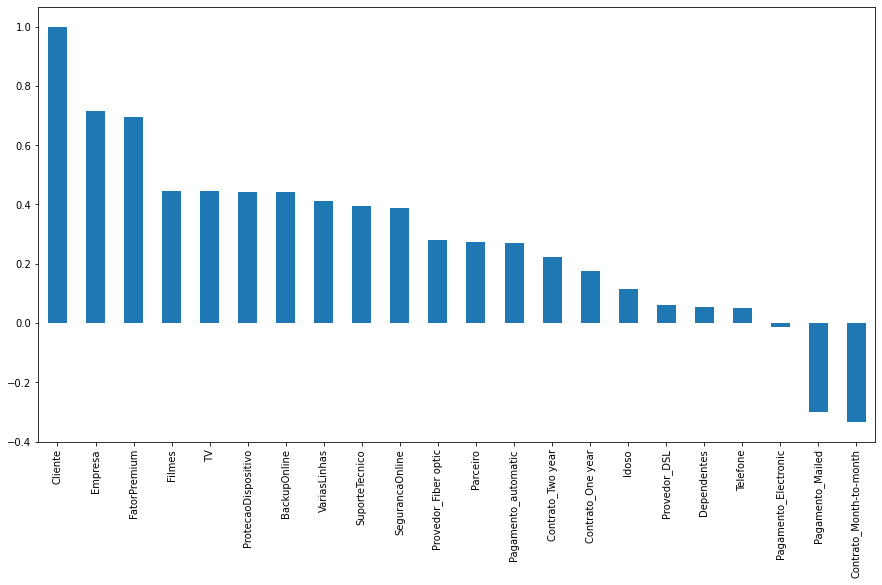

In [ ]:
plt.figure(figsize=(15,8))
dt_treino4.corr()['Cliente'].sort_values(ascending = False).plot(kind='bar')

#Combinação

In [ ]:
mol_grad = GradientBoostingClassifier(learning_rate = 0.16, max_depth = 3, n_estimators = 70)
mol_ada = AdaBoostClassifier()
mol_mlp = MLPClassifier(hidden_layer_sizes=(75), max_iter = 1600, solver='adam', alpha = 0.001, activation = 'relu', learning_rate = 'constant')

mol_rand = RandomForestClassifier()
mol_bag = BaggingClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xtreino, ytreino, test_size=0.25, shuffle =True)
mol_grad.fit(X_train, y_train)
mol_ada.fit(X_train, y_train)
mol_mlp.fit(X_train, y_train)
mol_rand.fit(X_train, y_train)
mol_bag.fit(X_train, y_train)

pre_gra = pd.DataFrame(mol_grad.predict_proba(X_train))
pre_ada = pd.DataFrame(mol_ada.predict_proba(X_train))
pre_mlp = pd.DataFrame(mol_mlp.predict_proba(X_train))
pre_ran = pd.DataFrame(mol_rand.predict_proba(X_train))
pre_bag = pd.DataFrame(mol_bag.predict_proba(X_train))

comb_t = pd.concat([pre_gra, pre_ada, pre_mlp, pre_ran, pre_bag],axis=1)

In [ ]:
red = GradientBoostingClassifier()
red.fit(comb_t, y_train)
pred_com_t = red.predict(comb_t)
confusion_matrix(y_train, pred_com_t)

array([[978,   0],
       [  2, 895]])

In [ ]:
pred_gra = pd.DataFrame(mol_grad.predict_proba(X_test))
pred_ada = pd.DataFrame(mol_ada.predict_proba(X_test))
pred_mlp = pd.DataFrame(mol_mlp.predict_proba(X_test))
pred_rand = pd.DataFrame(mol_rand.predict_proba(X_test))
pred_bag = pd.DataFrame(mol_bag.predict_proba(X_test))

print("Gra: ", metrics.f1_score( y_train, mol_grad.predict(X_train) ))
print("Ada: ", metrics.f1_score( y_train, mol_ada.predict(X_train) ))
print("MLP: ", metrics.f1_score( y_train, mol_mlp.predict(X_train) ))
print("Rand: ", metrics.f1_score( y_train, mol_rand.predict(X_train) ))
print("Bag: ", metrics.f1_score( y_train, mol_bag.predict(X_train) ))

print("\nTeste\nGra: ", metrics.f1_score( y_test, mol_grad.predict(X_test) ))
print("Ada: ", metrics.f1_score( y_test, mol_ada.predict(X_test) ))
print("MLP: ", metrics.f1_score( y_test, mol_mlp.predict(X_test) ))
print("Rand: ", metrics.f1_score( y_test, mol_rand.predict(X_test) ))
print("Bag: ", metrics.f1_score( y_test, mol_bag.predict(X_test) ))

comb = pd.concat([pred_gra, pred_ada,pred_mlp,pred_rand,pred_bag],axis=1)

pred_red = red.predict(comb)
print('\nTeste: ', metrics.f1_score(y_test, pred_red))

Gra:  0.9961046188091264
Ada:  0.9855394883203561
MLP:  0.9972113775794758
Rand:  0.9988839285714286
Bag:  0.9966517857142858

Teste
Gra:  0.9892857142857143
Ada:  0.9892857142857143
MLP:  0.9820143884892086
Rand:  0.9735449735449736
Bag:  0.9785714285714285

Teste:  0.9719298245614035


In [ ]:
confusion_matrix(y_test, pred_red)

array([[332,  13],
       [  3, 277]])

#Sub

In [ ]:
#dt_teste4['FatorPremium'].value_counts()

In [ ]:
grad = GradientBoostingClassifier(learning_rate = 0.16, max_depth = 3, n_estimators = 70)
ada = AdaBoostClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(75), max_iter = 1600, solver='adam', alpha = 0.001, activation = 'relu', learning_rate = 'constant')
rand = RandomForestClassifier()
bag = BaggingClassifier()

grad.fit(xtreino, ytreino)
ada.fit(xtreino, ytreino)
mlp.fit(xtreino, ytreino)
rand.fit(xtreino, ytreino)
bag.fit(xtreino, ytreino)
#Treinar Validador
p_gra = pd.DataFrame(grad.predict_proba(xtreino))
p_ada = pd.DataFrame(ada.predict_proba(xtreino))
p_mlp = pd.DataFrame(mlp.predict_proba(xtreino))
p_rand = pd.DataFrame(rand.predict_proba(xtreino))
p_bag = pd.DataFrame(bag.predict_proba(xtreino))
comb_tsub = pd.concat([p_gra, p_ada, p_mlp,p_rand,p_bag],axis=1)

print("Gra: ", metrics.f1_score( ytreino, grad.predict(xtreino) ))
print("Ada: ", metrics.f1_score( ytreino, ada.predict(xtreino) ))
print("MLP: ", metrics.f1_score( ytreino, mlp.predict(xtreino) ))
print("Rand: ", metrics.f1_score( ytreino, rand.predict(xtreino) ))
print("Bag: ", metrics.f1_score( ytreino, bag.predict(xtreino) ))
#print(confusion_matrix(ytreino, grad.predict(xtreino)))

classificador = GradientBoostingClassifier()
classificador.fit(comb_tsub, ytreino)
print('Treino: ', metrics.f1_score(ytreino, classificador.predict(comb_tsub) ) )

sub_gra = pd.DataFrame(grad.predict_proba(dt_teste4))
sub_ada = pd.DataFrame(ada.predict_proba(dt_teste4))
sub_mlp = pd.DataFrame(mlp.predict_proba(dt_teste4))
sub_rand = pd.DataFrame(rand.predict_proba(dt_teste4))
sub_bag = pd.DataFrame(bag.predict_proba(dt_teste4))
comb2 = pd.concat([sub_gra, sub_ada, sub_mlp,sub_rand,sub_bag],axis=1)

pred_red_sub = classificador.predict(comb2)
#Matriz Confusão treino classificador
pred_sub_tr = classificador.predict(comb_tsub)
print(confusion_matrix(ytreino, pred_sub_tr))
#0.9982993197278911
#0.9987250318742031
#0.9987239472564866
subm = pd.DataFrame()
subm['Cliente'] = pred_red_sub
res = (subm == sub1)
comp = res[res['Cliente'] == False].count()
res2 = (subm == sub2)
comp2 = res2[res2['Cliente'] == False].count()
res3 = (subm == sub3)
comp3 = res3[res3['Cliente'] == False].count()
res3v = (subm == sub3v)
comp3v = res3v[res3v['Cliente'] == False].count()
res4 = (subm == sub4)
comp4 = res4[res4['Cliente'] == False].count()
res5 = (subm == sub5)
comp5 = res5[res5['Cliente'] == False].count()
print(comp)
print(comp2)
print(comp3v)
print(comp4)
print(comp5)


Gra:  0.9944845142129826
Ada:  0.9864291772688719
MLP:  0.997875053123672
Rand:  0.9991496598639457
Bag:  0.9991496598639457
Treino:  0.9991496598639457
[[1323    0]
 [   2 1175]]
Cliente    30
dtype: int64
Cliente    29
dtype: int64
Cliente    55
dtype: int64
Cliente    42
dtype: int64
Cliente    49
dtype: int64


In [ ]:
[[1322    1]
 [   2 1175]]
Cliente    54
dtype: int64
Cliente    53
dtype: int64
Cliente    75
dtype: int64
Cliente    66
dtype: int64
Cliente    61
dtype: int64

In [ ]:
((subm == sub1) & (subm == sub2) & (subm == sub3) & (subm == sub3v)) ['Cliente'].value_counts()

True     2393
False     107
Name: Cliente, dtype: int64

In [ ]:
pd.concat([sub1, sub2, sub3, sub3v], axis=1)

In [ ]:
#Comparar com sub
sub1 = pd.read_csv('/content/submissao1.csv')
sub2 = pd.read_csv('/content/submissão2.csv')
sub3 = pd.read_csv('/content/submissão3.csv')
sub3v = pd.read_csv('/content/submissão3_v2.csv')
sub4 = pd.read_csv('/content/submissão4.csv')
sub5 = pd.read_csv('/content/submissão5.csv')

In [ ]:
#salvando modelo
import pickle
ver = ''
pickle.dump(red, open('sub16_red' + ver, 'wb'))
pickle.dump(grad, open('sub16_grad'+ ver, 'wb'))
pickle.dump(ada, open('sub16_ada'+ ver, 'wb'))
pickle.dump(mlp, open('sub16_mlp'+ ver, 'wb'))
pickle.dump(classificador, open('sub16_Classificador'+ ver, 'wb'))

In [ ]:
subm.to_csv('submissão16.csv', index = False)

In [ ]:
subm

,Cliente
0,0
1,0
2,0
3,1
4,1
...,...
2495,1
2496,0
2497,0
2498,0
